In [1]:
#网页请求
import requests
#延时操作
import time
#分词操作
import jieba
#图片格式转换为数组
import numpy as np
#词云制作
from wordcloud import WordCloud as wc


In [35]:
#!pip install jieba

In [46]:
#!pip install wordcloud

#获取信息
def get_page(self):
    try:
    # 延时操作，防止太快爬取
        time.sleep(0.5)
        response=requests.get(self.url,headers=self.headers)
    except Exception as e:
        print('获取xml内容失败,%s' % e)
        return False
    else:
        if response.status_code == 200:
        # 下载xml文件
            with open('bilibili.xml','wb') as f:
                f.write(response.content)
            return True
        else:
            return False
 
#解析网页
def param_page(self):
    time.sleep(1)
    if  self.barrage_reault:
    # 文件路径，html解析器
        html=etree.parse('bilibili.xml',etree.HTMLParser())
        # xpath解析，获取当前所有的d标签下的所有文本内容
        results=html.xpath('//d//text()')
        return results

In [2]:
from bs4 import BeautifulSoup

In [3]:
import glob
glob.glob('./*/*')

['.\\data\\bikes.csv', '.\\data\\bilibli.xml', '.\\data\\popularity-contest']

In [4]:
with open('.\\data\\bilibli.xml','r',encoding='utf-8') as f:
    soup = BeautifulSoup(f,'lxml')
    msg = soup.select('d')
    print(msg[:10])

[<d p="244.96900,5,25,16777215,1619977527,0,2c4a3151,48672461522206727">这哥们真是收放自如 哈哈哈</d>, <d p="256.79900,5,25,16776960,1619972717,0,925f0d6c,48669939621429251">虽然很不地道，但up我很想看那个录像完整版</d>, <d p="391.45200,5,25,15138834,1619968738,0,13d38a53,48667853140787207">《我把自己打包起来》</d>, <d p="383.84700,1,25,16777215,1619967542,0,26178af7,48667226179895303">你这醉酒还带自我管理意识打</d>, <d p="229.93400,1,25,16777215,1619963930,0,c67ea894,48665332535525383">这个“恐惧”笑死我了哈哈哈哈哈哈</d>, <d p="222.19900,5,25,16707842,1619963619,0,1483b443,48665169271717893">《  幸  福  感  》</d>, <d p="143.76600,5,25,15772458,1619942125,0,3811fb3c,48653900539494405">《买一个早餐店》</d>, <d p="103.80400,5,25,16777215,1619940062,0,9278564d,48652818866765827">《 睡 着 了 ， 但 又 没 有 睡 着 》</d>, <d p="9.16300,4,25,16776960,1620377767,0,34844124,48882302377263109">按照这个播放量，光B站一个地方播放就能赚3W多了，这太吊了</d>, <d p="0.65500,1,25,16646914,1620377731,0,b4047b1b,48882283237081095">究 极 作 战 记 录</d>]


In [11]:
print(type(msg))
for text in msg:
    t = text.get_text()
    with open("test.txt","a+",encoding="utf-8") as f:
        f.write(t)
print(type(t))
print(t)

<class 'list'>
<class 'str'>
博  卓  卡  斯  替


In [19]:
from os import path
path.dirname(__file__)

NameError: name '__file__' is not defined

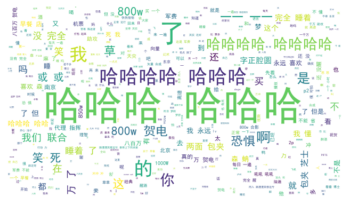

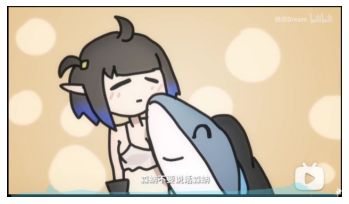

In [8]:
#!/usr/bin/Python
# -*- coding: utf-8 -*-
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud, STOPWORDS


###当前文件路径
d = os.getcwd()

# Read the whole text.
file = open('test.txt','r',encoding="utf-8").read()
##进行分词
#刚开始是分完词放进txt再打开却总是显示不出中文很奇怪
default_mode =jieba.cut(file)
text = " ".join(default_mode)
alice_mask = np.array(Image.open("chess.jpg"))
stopwords = set(STOPWORDS)
stopwords.add("said")
wc = WordCloud(  
    #设置字体，不指定就会出现乱码,这个字体文件需要下载
    font_path=r'simhei.ttf',  
    background_color="white",   
    max_words=2000,   
    mask=alice_mask,  
    stopwords=stopwords)  
# generate word cloud
wc.generate(text)

# store to file
wc.to_file("result.jpg")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

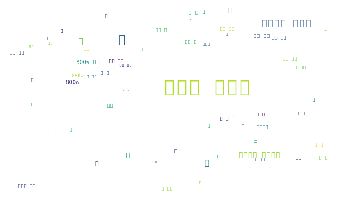

In [29]:
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud


# 1.读入txt文本数据
text = open(r'test.txt', "r",encoding="utf-8").read()
#print(text)
# 2.结巴中文分词，生成字符串，默认精确模式，如果不通过分词，无法直接生成正确的中文词云
cut_text = jieba.cut(text)
# print(type(cut_text))
# 必须给个符号分隔开分词结果来形成字符串,否则不能绘制词云
result = " ".join(cut_text)
#print(result)
# 3.生成词云图，这里需要注意的是WordCloud默认不支持中文，所以这里需已下载好的中文字库
# 无自定义背景图：需要指定生成词云图的像素大小，默认背景颜色为黑色,统一文字颜色：mode='RGBA'和colormap='pink'
wc = WordCloud(
        # 设置字体，不指定就会出现乱码
        # 设置背景色
        background_color='white',
        # 设置背景宽
        width=800,
        # 设置背景高
        height=450,
        # 最大字体
        max_font_size=50,
        # 最小字体
        min_font_size=10,
        mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(result)
# 保存图片
wc.to_file(r"wordcloud.png") # 按照设置的像素宽高度保存绘制好的词云图，比下面程序显示更清晰
# 4.显示图片
# 指定所绘图名称
plt.figure("jay")
# 以图片的形式显示词云
plt.imshow(wc)
# 关闭图像坐标系
plt.axis("off")
plt.show()

In [35]:
from wordcloud import WordCloud
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
 
def read_deal_text():
    with open("test.txt","r",encoding="utf-8") as f:
        txt=f.read()
    re_move=["，","。"," ",'\n','\xa0']
       #去除无效数据
    for i in re_move:
        txt=txt.replace(i," ") 
    word=jieba.lcut(txt)  #使用精确分词模式
 
    
    with open("txt_save.txt",'w',encoding="utf-8") as file:
        for i in word:    
            file.write(str(i)+' ')
    print("文本处理完成")
 
def img_grearte():
    mask=imread("hanter.jpg")
    with open("txt_save.txt","r",encoding="utf-8") as file:
        txt=file.read()
    word=WordCloud(background_color="white",\
                    width=800,\
                   height=800,
                   font_path='simhei.ttf',
                   mask=mask,
                   ).generate(txt)
    word.to_file('test.png')
    print("词云图片已保存")
    
    plt.imshow(word)    #使用plt库显示图片
    plt.axis("off")
    plt.show()
 
 


ImportError: cannot import name 'imread' from 'scipy.misc' (C:\ProgramData\Anaconda3\lib\site-packages\scipy\misc\__init__.py)

In [ ]:
# !pip uninstall scipy
# !pip uninstall pillow

In [1]:
#!pip install pillow==5.2.0
#!pip install scipy==1.1.0

  ERROR: Could not find a version that satisfies the requirement pillow==5.2.0 (from versions: none)
ERROR: No matching distribution found for pillow==5.2.0


In [34]:
read_deal_text()
img_grearte()

文本处理完成


NameError: name 'imread' is not defined